In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv("Kaggle_Training_Dataset_v2.csv")
test=pd.read_csv("Kaggle_Test_Dataset_v2.csv")
train.shape,test.shape

C:\Users\thoma\AppData\Local\Temp\ipykernel_972\3918046162.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv("Kaggle_Training_Dataset_v2.csv")
C:\Users\thoma\AppData\Local\Temp\ipykernel_972\3918046162.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test=pd.read_csv("Kaggle_Test_Dataset_v2.csv")


((1687861, 23), (242076, 23))

In [3]:
train.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [4]:
test.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


## Data Dictionary
* sku - sku code
* national_inv - Current inventory level of component
* lead_time - Transit time
* in_transit_qtry - Quantity in transit
* forecast_x_month - Forecast sales for the net 3, 6, 9 months
* sales_x_month - Sales quantity for the prior 1, 3, 6, 9 months
* min_bank - Minimum recommended amount in stock
* potential_issue - Indictor variable noting potential issue with item
* pieces_past_due - Parts overdue from source
* perf_x_months_avg - Source performance in the last 6 and 12 months
* local_bo_qty - Amount of stock orders overdue
* X17-X22 - General Risk Flags
* went_on_back_order - Product went on backorder
### Questions 
* Is Transit time a potential cause of backorder
* Does Quantity in transit affluential in predicting Back order
* Forecasted Sales and impact on Back order
* Prior Sales Imact on Back order
* Min Recommended stock and Back order
* Issues with the product and Back order status
* Parts overdue from source
* Source performance in last 6 and 12 months
* Amount of stock overdue
* Risk Factors

### Segmenting 
* Store Related
* Seller/Source Related
* Risk Flags


In [ ]:
train.columns

In [ ]:
train.isnull().sum()/train.shape[0]*100

In [ ]:
test.isnull().sum()

In [ ]:
train.info()

In [5]:
# Handling Missing Values
# 5% of values are missing form lead time
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

-0.049517600040417165


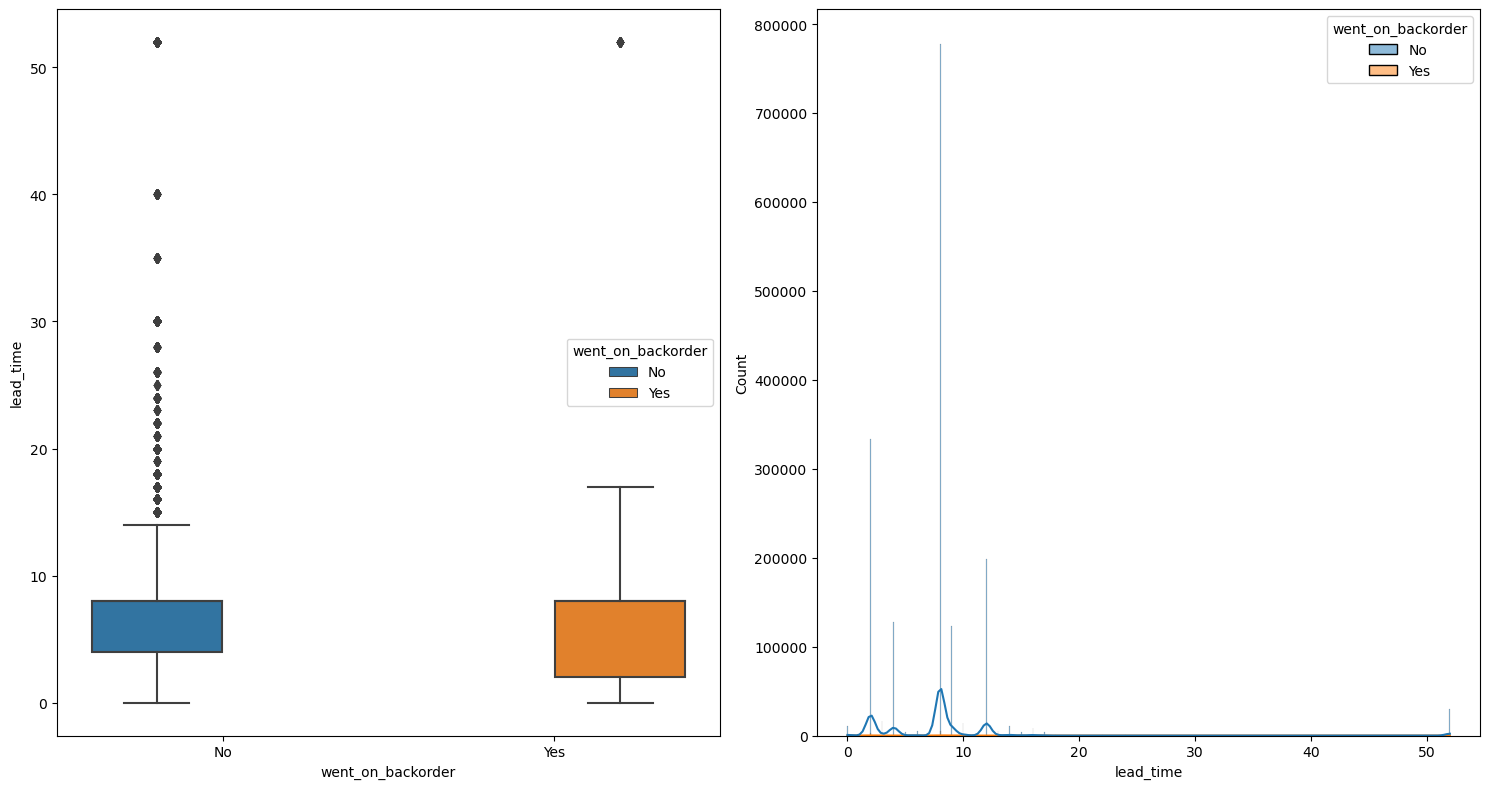

In [12]:

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sn.boxplot(data=train,x="went_on_backorder",y="lead_time",hue="went_on_backorder")
plt.tight_layout()
plt.subplot(1,2,2)
sn.histplot(data=train,x="lead_time",hue="went_on_backorder",kde=True)
plt.tight_layout()


In [6]:
train[train['lead_time'].isnull()]['went_on_backorder'].value_counts()

No     100569
Yes       324
Name: went_on_backorder, dtype: int64

In [7]:
train['went_on_backorder'].value_counts()

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

In [8]:
train['lead_time'].skew()
train['lead_time']=train['lead_time'].fillna(train['lead_time'].median())

In [9]:
train.isnull().sum()

sku                  0
national_inv         1
lead_time            0
in_transit_qty       1
forecast_3_month     1
forecast_6_month     1
forecast_9_month     1
sales_1_month        1
sales_3_month        1
sales_6_month        1
sales_9_month        1
min_bank             1
potential_issue      1
pieces_past_due      1
perf_6_month_avg     1
perf_12_month_avg    1
local_bo_qty         1
deck_risk            1
oe_constraint        1
ppap_risk            1
stop_auto_buy        1
rev_stop             1
went_on_backorder    1
dtype: int64

In [10]:
train.dropna(axis=0,inplace=True)

In [11]:
def hist_box(col,df):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sn.histplot(data=df,x=col,hue="went_on_backorder",kde=True)
    plt.title(f"Distribution by {col} & went_on_backorder Histograms", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    
    plt.subplot(1,2,2)
    sn.boxplot(data=df,x="went_on_backorder",y=col,hue="went_on_backorder")
    plt.title(f"Distribution by {col} & went_on_backorder boxplots", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()
    

In [12]:
def plot_piebar(col,df):
    plt.figure(figsize=(14, 6))
    value_counts = df[col].value_counts().sort_index()

    # Create a pie chart to show the distribution of WorkLifeBalance

    plt.subplot(1,2,1)
    plt.pie(value_counts, labels=value_counts.index, autopct="%0.1f%%")
    plt.title(f"{col} Distribution")
    #plt.show()

    # Filter the DataFrame for Attrition == 'Yes'
    new_df = df[df["went_on_backorder"] == 'Yes']

    # Calculate value counts for the filtered data
    value_2 = new_df[col].value_counts().sort_index()

    # Calculate percentages based on the counts
    percentage = round((value_2 / value_counts) * 100, 2)  # Round the percentages to two decimal places

    # Create a bar plot
    plt.subplot(1,2,2)
    bar = sn.barplot(x=value_2.index, y=value_2.values, palette='Set2')

    # Add labels to the bars showing counts and percentages
    for index, value in enumerate(value_2):
        per=percentage[index]
        bar.text(index, value, f'{value} ({per}%)', ha="center", va="bottom", fontsize=10)


    plt.title(f"went_on_backorder Rate by {col}")
    plt.show()

In [13]:
cat_cols=[i for i in train.columns if train[i].dtype=="object" and train[i].nunique() <= 5]
cat_cols

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

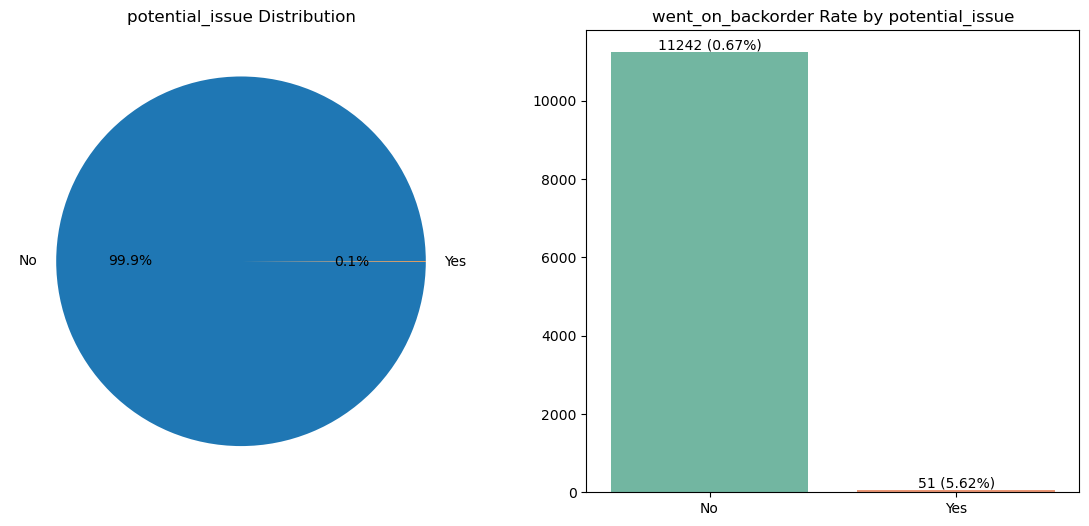

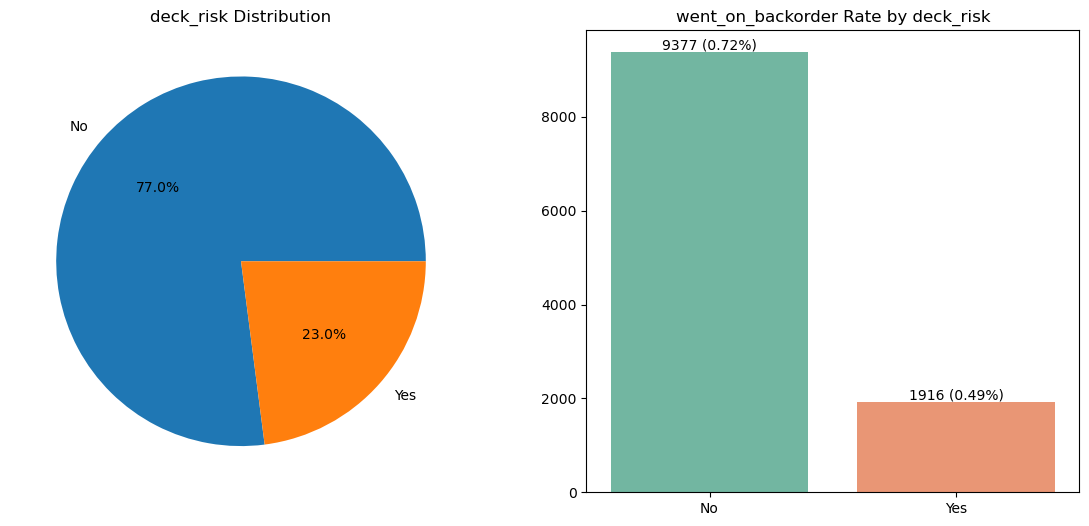

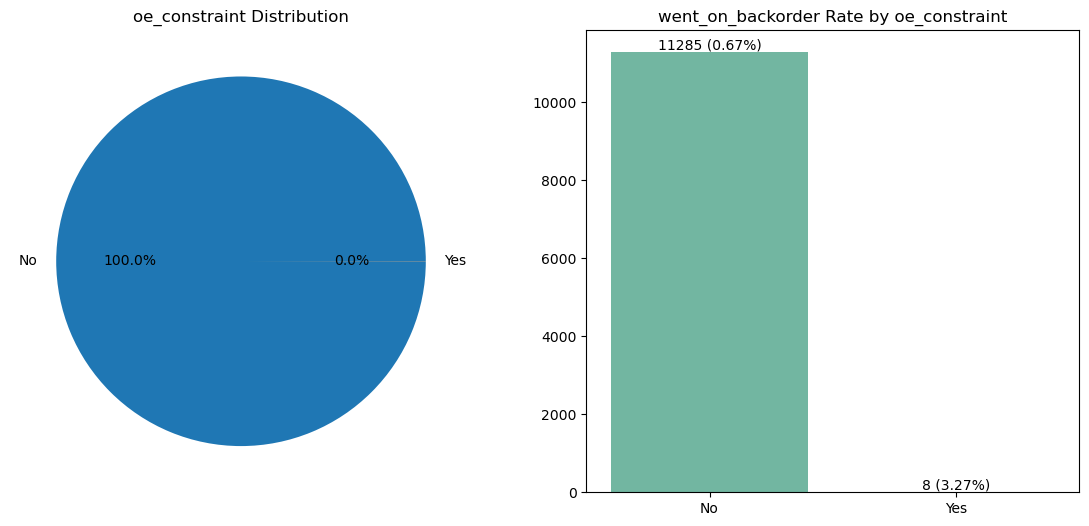

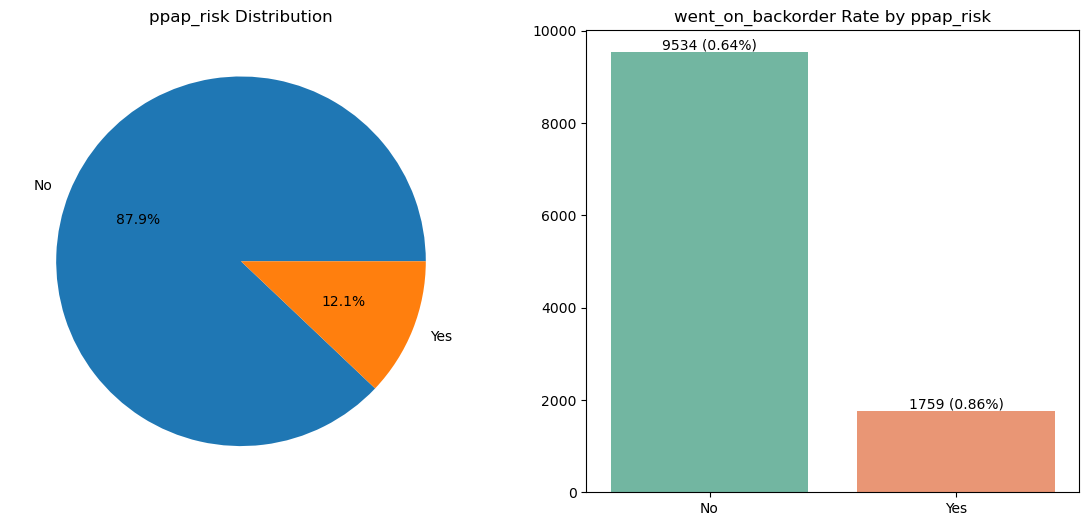

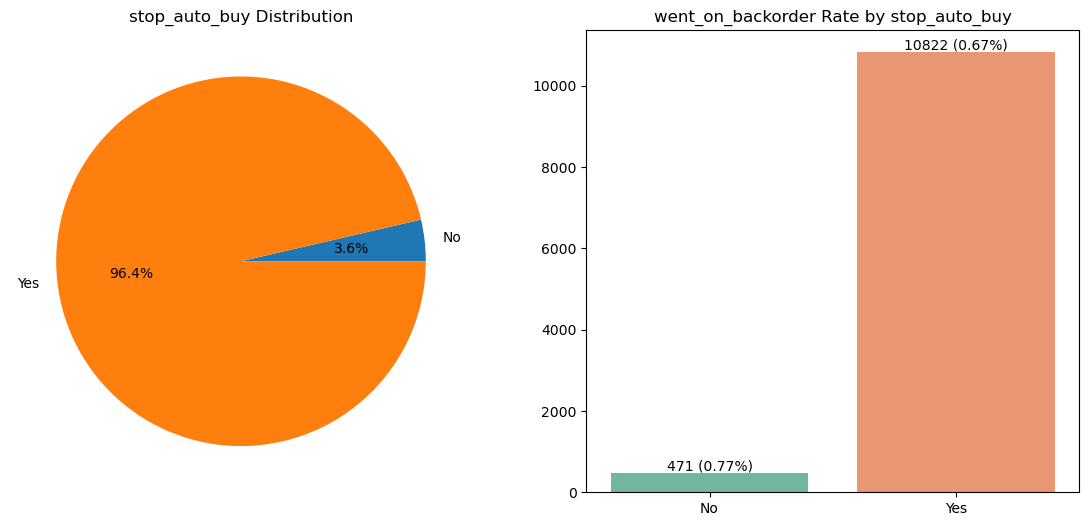

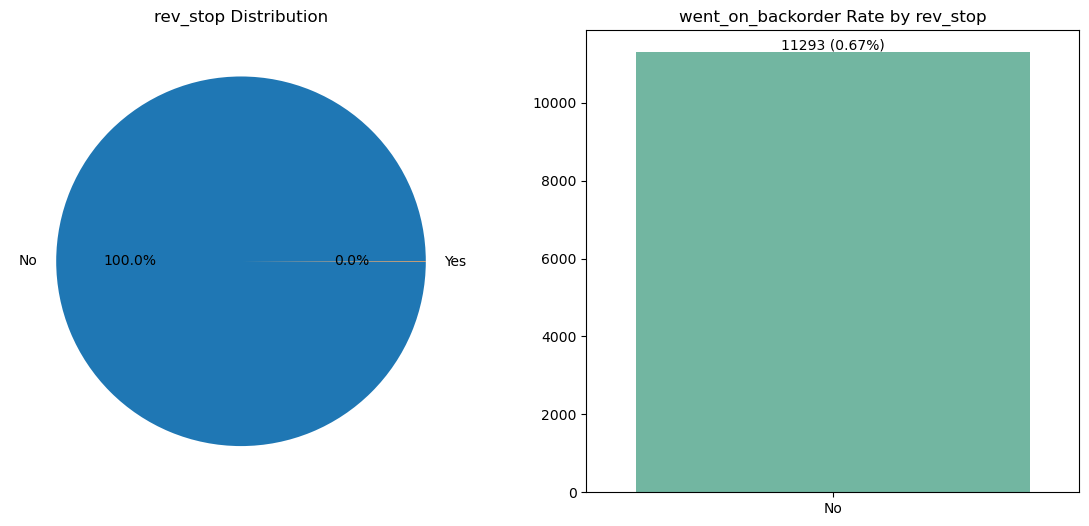

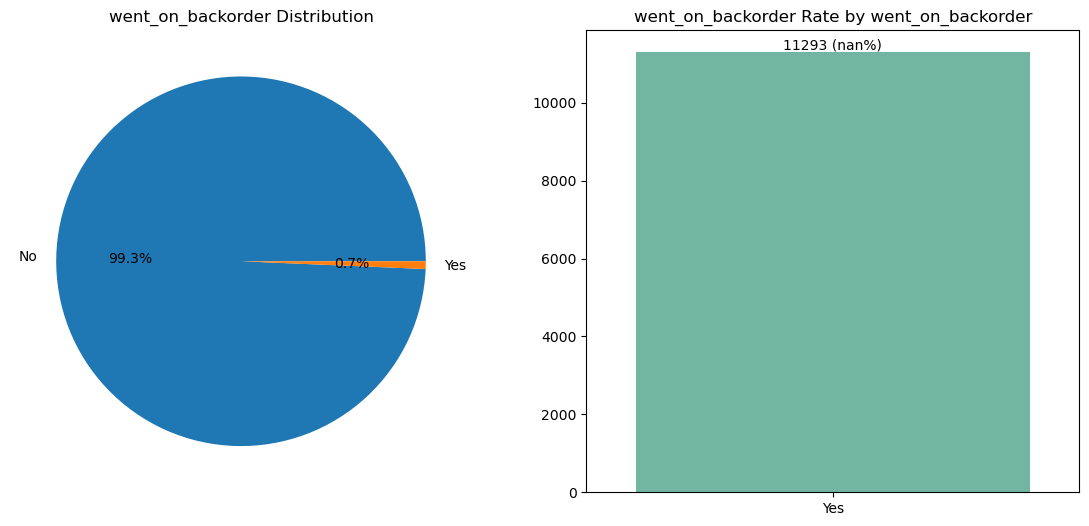

In [31]:
for i in cat_cols:
    plot_piebar(i,train)

In [14]:
num_cols=train.columns[train.dtypes!="object"]
num_cols

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')

In [15]:
skew={}
for i in num_cols:
    skew[i]=train[i].skew()
skew

{'national_inv': 340.2858003326191,
 'lead_time': 4.695413484039694,
 'in_transit_qty': 166.18340424761558,
 'forecast_3_month': 138.96832519579834,
 'forecast_6_month': 138.96142721254265,
 'forecast_9_month': 143.298874740098,
 'sales_1_month': 196.1199898556541,
 'sales_3_month': 141.2863795444832,
 'sales_6_month': 139.17671201086372,
 'sales_9_month': 135.05419147168155,
 'min_bank': 131.21264893012795,
 'pieces_past_due': 412.39190039252696,
 'perf_6_month_avg': -3.180621807495058,
 'perf_12_month_avg': -3.3021812484797537,
 'local_bo_qty': 165.19054793748316}

In [19]:
#Removing constant variance features
from sklearn.feature_selection import VarianceThreshold
varianceT=VarianceThreshold(threshold=0.05)

In [20]:
varianceT.fit(train[num_cols])

VarianceThreshold(threshold=0.05)

In [23]:
varianceT.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [26]:
# All the columns num cols have some kind of variance
train.drop("sku",axis=1,inplace=True)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687860 entries, 0 to 1687859
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1687860 non-null  float64
 1   lead_time          1687860 non-null  float64
 2   in_transit_qty     1687860 non-null  float64
 3   forecast_3_month   1687860 non-null  float64
 4   forecast_6_month   1687860 non-null  float64
 5   forecast_9_month   1687860 non-null  float64
 6   sales_1_month      1687860 non-null  float64
 7   sales_3_month      1687860 non-null  float64
 8   sales_6_month      1687860 non-null  float64
 9   sales_9_month      1687860 non-null  float64
 10  min_bank           1687860 non-null  float64
 11  potential_issue    1687860 non-null  object 
 12  pieces_past_due    1687860 non-null  float64
 13  perf_6_month_avg   1687860 non-null  float64
 14  perf_12_month_avg  1687860 non-null  float64
 15  local_bo_qty       1687860 non-n

In [25]:
cor_matrix=train[num_cols].corr()
cols_corr=set()
for i in range(len(cor_matrix.columns)):
    for j in range(i):
        if cor_matrix.iloc[i,j] > 0.90:
            col_name=cor_matrix.columns[i]
            cols_corr.add(col_name)
cols_corr

{'forecast_6_month',
 'forecast_9_month',
 'perf_12_month_avg',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month'}

<Axes: >

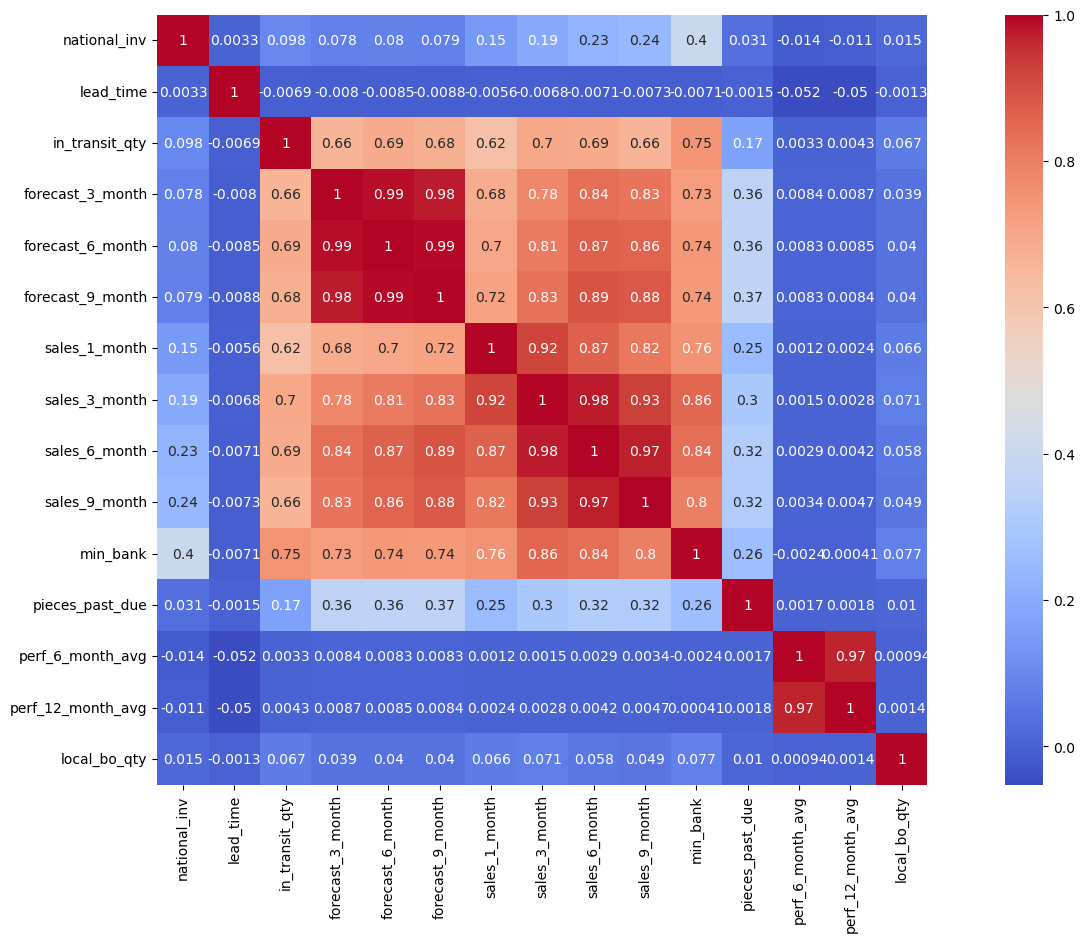

In [39]:
plt.figure(figsize=(20,10))
sn.heatmap(cor_matrix,annot=True,cmap="coolwarm",square=True)

In [36]:
new_train=train.drop(cols_corr,axis=1)
new_train.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'sales_1_month', 'min_bank', 'potential_issue',
       'pieces_past_due', 'perf_6_month_avg', 'local_bo_qty', 'deck_risk',
       'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop',
       'went_on_backorder'],
      dtype='object')

In [27]:
from sklearn.model_selection import train_test_split
X=train.drop(columns="went_on_backorder")
y=train['went_on_backorder']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
encoder=LabelEncoder()

In [30]:
cats=train[cat_cols]
cats

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,No,No,No,No,Yes,No,No
1,No,No,No,No,Yes,No,No
2,No,Yes,No,No,Yes,No,No
3,No,No,No,No,Yes,No,No
4,No,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...
1687855,No,Yes,No,No,Yes,No,No
1687856,No,No,No,No,Yes,No,No
1687857,No,Yes,No,No,No,No,Yes
1687858,No,No,No,No,Yes,No,No


In [31]:
for i in cats.columns:
    cats[i]=encoder.fit_transform(cats[i])
cats

C:\Users\thoma\AppData\Local\Temp\ipykernel_972\1463325968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cats[i]=encoder.fit_transform(cats[i])
C:\Users\thoma\AppData\Local\Temp\ipykernel_972\1463325968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cats[i]=encoder.fit_transform(cats[i])
C:\Users\thoma\AppData\Local\Temp\ipykernel_972\1463325968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...
1687855,0,1,0,0,1,0,0
1687856,0,0,0,0,1,0,0
1687857,0,1,0,0,0,0,1
1687858,0,0,0,0,1,0,0


In [32]:
encoder.inverse_transform(cats['deck_risk'])

array(['No', 'No', 'Yes', ..., 'Yes', 'No', 'No'], dtype=object)

In [21]:
#Lets Now deal with the categoircal values We will use Chisquare test for feature selection
from sklearn.feature_selection import chi2
values=chi2(cats.drop(columns="went_on_backorder"),cats['went_on_backorder'])
p_vals=pd.Series(values[1])
p_vals.index=cats.drop(columns="went_on_backorder").columns
p_vals.sort_index(ascending=False)


stop_auto_buy      5.491236e-01
rev_stop           2.648826e-02
ppap_risk          6.784392e-27
potential_issue    8.162750e-75
oe_constraint      6.202430e-07
deck_risk          1.512032e-40
dtype: float64

In [34]:
cats.head()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,1,0,0,1,0,0


In [35]:
new_train.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_1_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.0,No,No,No,Yes,No,No
4,1044048,8.0,8.0,0.0,0.0,0.0,2.0,No,0.0,-99.00,0.0,Yes,No,No,Yes,No,No


In [22]:
from sklearn.feature_selection import RFE

In [23]:
train

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,...,0.0,0.69,0.69,5.0,Yes,No,No,Yes,No,No
1687856,1373987,-1.0,8.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No


In [37]:
new_train.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,sales_1_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,8.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,8.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.0,No,No,No,Yes,No,No
4,1044048,8.0,8.0,0.0,0.0,0.0,2.0,No,0.0,-99.00,0.0,Yes,No,No,Yes,No,No


In [ ]:
rfe=RFE()